In [25]:
import numpy as np
import pandas as pd 

In [26]:
power = 0.8 # power
p     = 0.05 #p value
S     = 0.25 # ship rate

In [29]:
def get_confusion_matrix(S,p):
    p = p / 2 # only 1 side of the distribution will ship
    
    # equation: B = A * [TP, FP, TN, FP]
    # we invent A to get the confusion matrix

    A = np.matrix([
        [  power - 1   ,0      ,0      ,power]  # power
        ,[ 0           ,p-1    , p     ,0]      # p-value
        ,[ S-1         ,S-1    , S     ,S]      # ship rate
        ,[ 1           ,1      , 1     ,1]      # SUM(fraq) = 1
        ])

    A_inv = np.linalg.inv(A)

    B = np.array([
        [0], 
        [0],
        [0],
        [1] # sum of all fractions equals to 1
    ])

    conf_matrix = A_inv * B
    return conf_matrix


def get_FDR(S,p):
    '''
    False discovery rate
    '''
    conf_matrix = get_confusion_matrix(S,p);

    fp_given_shipped = 100.0 * float(conf_matrix[1]) / (float(conf_matrix[0]) + float(conf_matrix[1]))

    return fp_given_shipped

In [30]:
# Tests
get_confusion_matrix(0.15,p)

matrix([[0.12903226],
        [0.02096774],
        [0.81774194],
        [0.03225806]])

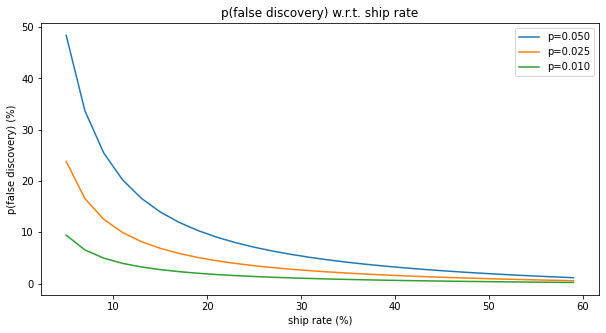

In [31]:
# Plot
ship_range = np.arange(5,60,2)

df = pd.DataFrame(
    {
    'p=0.050' :  [get_FDR(s/100,0.05) for s in ship_range],
    'p=0.025' :  [get_FDR(s/100,0.025) for s in ship_range],
    'p=0.010' :  [get_FDR(s/100,0.01) for s in ship_range],
    }
    ,index=ship_range)

lines = df.plot.line(title='p(false discovery) w.r.t. ship rate'
                     ,xlabel='ship rate (%)'
                     ,ylabel='p(false discovery) (%)'
                    ,figsize=(10, 5)
                    )

In [24]:
print("'p(FP | shipped) w.r.t. ship rate")
df.iloc[::3,]

'p(FP | shipped) w.r.t. ship rate


,p=0.050,p=0.025,p=0.010
5,48.387097,23.809524,9.433962
11,20.234604,9.956710,3.945111
17,11.954459,5.882353,2.330744
23,7.994390,3.933747,1.558655
29,5.672970,2.791461,1.106051
35,4.147465,2.040816,0.808625
41,3.068450,1.509872,0.598251
47,2.264928,1.114488,0.441590
53,1.643335,0.808625,0.320399
59,1.148168,0.564972,0.223857
